In [2]:
# Import important standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, RocCurveDisplay

In [3]:
combine_raw_df  = pd.read_csv('resources/combine_df.csv')

combine_raw_df.head()

,Year,Name,College,POS,Height (in),Weight (lbs),BMI,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1987,Mike Adams,Arizona State,CB,69.8,198.0,28.6,4.42,13.0,32.0,118.0,4.60,NaN
1,1987,John Adickes,Baylor,C,74.8,266.0,33.4,4.97,25.0,26.5,103.0,4.60,NaN
2,1987,Tommy Agee,Auburn,FB,71.8,217.0,29.6,NaN,15.0,NaN,NaN,NaN,NaN
3,1987,David Alexander,Tulsa (OK),C,75.0,279.0,34.9,5.13,22.0,27.5,105.0,4.33,NaN
4,1987,Lyneal Alston,Southern Mississippi,WR,72.1,202.0,27.3,4.64,7.0,32.0,114.0,4.52,NaN


In [4]:
combine_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14164 entries, 0 to 14163
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             14164 non-null  int64  
 1   Name             14164 non-null  object 
 2   College          14157 non-null  object 
 3   POS              14164 non-null  object 
 4   Height (in)      14164 non-null  float64
 5   Weight (lbs)     14164 non-null  float64
 6   BMI              14164 non-null  float64
 7   40 Yard          12634 non-null  float64
 8   Bench Press      10276 non-null  float64
 9   Vert Leap (in)   12178 non-null  float64
 10  Broad Jump (in)  12055 non-null  float64
 11  Shuttle          11099 non-null  float64
 12  3Cone            3810 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.4+ MB


In [5]:
combine_ml_df = combine_raw_df.drop(columns='3Cone')
combine_ml_df.dropna(inplace=True)
combine_ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8509 entries, 0 to 14160
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             8509 non-null   int64  
 1   Name             8509 non-null   object 
 2   College          8509 non-null   object 
 3   POS              8509 non-null   object 
 4   Height (in)      8509 non-null   float64
 5   Weight (lbs)     8509 non-null   float64
 6   BMI              8509 non-null   float64
 7   40 Yard          8509 non-null   float64
 8   Bench Press      8509 non-null   float64
 9   Vert Leap (in)   8509 non-null   float64
 10  Broad Jump (in)  8509 non-null   float64
 11  Shuttle          8509 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 864.2+ KB


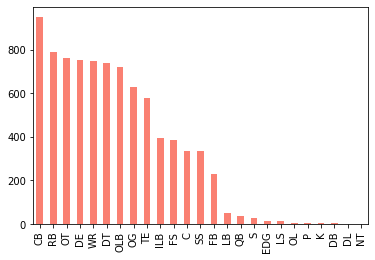

In [6]:
combine_ml_df['POS'].value_counts().plot(kind="bar", color=['salmon']);

<AxesSubplot:ylabel='Frequency'>

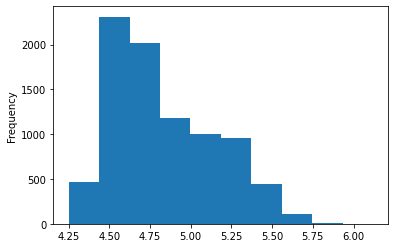

In [7]:
combine_ml_df['40 Yard'].plot.hist()

In [8]:
combine_ml_df.dtypes


Year                 int64
Name                object
College             object
POS                 object
Height (in)        float64
Weight (lbs)       float64
BMI                float64
40 Yard            float64
Bench Press        float64
Vert Leap (in)     float64
Broad Jump (in)    float64
Shuttle            float64
dtype: object

<AxesSubplot:ylabel='Frequency'>

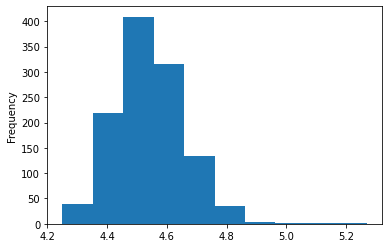

In [9]:
my_size_df = combine_ml_df.loc[(combine_ml_df['Height (in)'] >= 69) &
               (combine_raw_df['Height (in)'] <= 73) &
               (combine_raw_df['Weight (lbs)'] <= 198) &
               (combine_raw_df['Weight (lbs)'] <= 205)]

my_size_df['40 Yard'].plot.hist()

In [365]:
combine_ml_df.corr()

,Year,Height (in),Weight (lbs),BMI,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle
Year,1.000000,-0.006464,0.013938,0.021613,-0.164691,0.116822,0.194347,0.226758,-0.003177
Height (in),-0.006464,1.000000,0.750982,0.487479,0.625295,0.361742,-0.430616,-0.411298,0.530356
Weight (lbs),0.013938,0.750982,1.000000,0.941208,0.857803,0.630895,-0.635056,-0.674593,0.736187
BMI,0.021613,0.487479,0.941208,1.000000,0.810588,0.660457,-0.614985,-0.677088,0.697228
40 Yard,-0.164691,0.625295,0.857803,0.810588,1.000000,0.422216,-0.757910,-0.783943,0.770444
Bench Press,0.116822,0.361742,0.630895,0.660457,0.422216,1.000000,-0.256090,-0.309907,0.352981
Vert Leap (in),0.194347,-0.430616,-0.635056,-0.614985,-0.757910,-0.256090,1.000000,0.795193,-0.678828
Broad Jump (in),0.226758,-0.411298,-0.674593,-0.677088,-0.783943,-0.309907,0.795193,1.000000,-0.664198
Shuttle,-0.003177,0.530356,0.736187,0.697228,0.770444,0.352981,-0.678828,-0.664198,1.000000


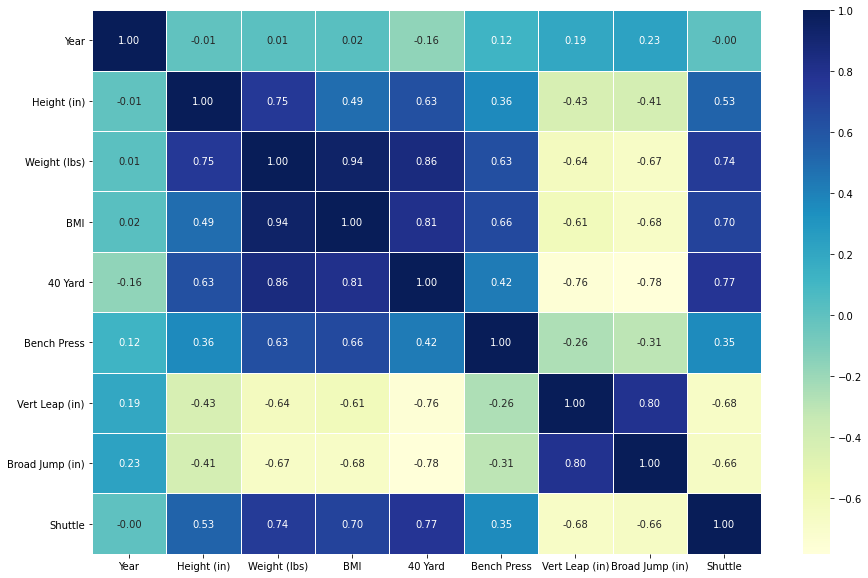

In [366]:
corr_matrix = combine_ml_df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap = 'YlGnBu')

<AxesSubplot:xlabel='Feature', ylabel='Correlation'>

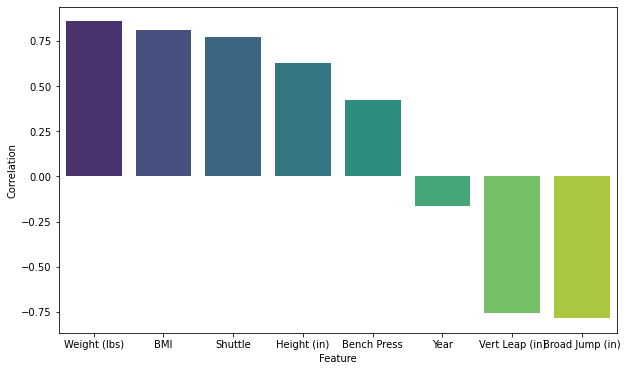

In [367]:
corr_df = combine_ml_df.corr()

# Extract the correlation values for the '40 Yard' column
corr_40_yard = corr_df['40 Yard'].drop('40 Yard')  # Exclude the '40 Yard' itself to avoid a perfect correlation value of 1

# Convert to a DataFrame for easier plotting
corr_40_yard_df = corr_40_yard.reset_index()
corr_40_yard_df.columns = ['Feature', 'Correlation']

# Sort by correlation values for better visualization
corr_40_yard_df = corr_40_yard_df.sort_values(by='Correlation', ascending=False)

# Create a vertical bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=corr_40_yard_df, x='Feature', y='Correlation', palette='viridis')

<AxesSubplot:xlabel='Feature', ylabel='Correlation'>

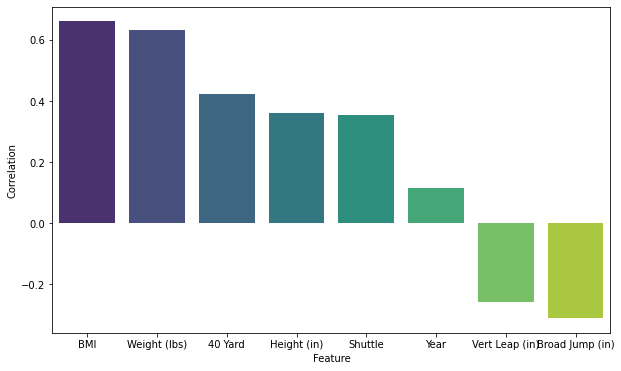

In [368]:
# Extract the correlation values for the 'Bench Press' column
corr_bench = corr_df['Bench Press'].drop('Bench Press')  # Exclude the '40 Yard' itself to avoid a perfect correlation value of 1

# Convert to a DataFrame for easier plotting
corr_bench_df = corr_bench.reset_index()
corr_bench_df.columns = ['Feature', 'Correlation']

# Sort by correlation values for better visualization
corr_bench_df = corr_bench_df.sort_values(by='Correlation', ascending=False)

# Create a vertical bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=corr_bench_df, x='Feature', y='Correlation', palette='viridis')

## Modeling

For this project I want to see if I can determine what position a player will be based of their performance in the NFL combine. I'll use position as the target and the other features determining characteristics.

### We're going to try:
1. K-Nearest Neighbors
2. Random Forest
3. Logistic Regression

In [369]:
# Split the data into X and y

X = combine_ml_df.drop(columns=['POS','Name','College'])
y = combine_ml_df['POS']

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
# Create dicitionary of models for quick access and testing.
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """

    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items(): 

        # Fit the model to the data
        model.fit(X_train, y_train)

        # Evaluate the model and append its score to model_score
        model_scores[name] = model.score(X_test, y_test)

    return model_scores



In [317]:
models_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
models_scores

c:\Users\seanc\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.3954171562867215,
 'KNN': 0.4236192714453584,
 'Random Forest': 0.5323149236192715}

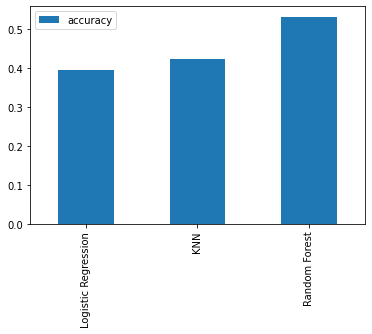

In [318]:
model_compare = pd.DataFrame(models_scores, index=["accuracy"])
model_compare.T.plot.bar();

These results are far from ideal. The first step we might take to improve the model is to refine the data. 

- We'll start by consolidating or removing positions that have very few occurances.

In [319]:
# Check original dataset
combine_raw_df['POS'].value_counts()

WR     1874
CB     1445
RB     1248
DE     1084
OT     1072
DT     1050
OLB    1037
OG      872
TE      804
QB      769
ILB     572
FS      548
SS      500
C       453
FB      318
P       163
K       145
LB       91
S        53
LS       26
EDG      22
OL       10
DL        4
DB        3
NT        1
Name: POS, dtype: int64

In [320]:
# Check current dataset
combine_ml_df['POS'].value_counts()

CB     950
RB     789
OT     761
DE     754
WR     748
DT     739
OLB    720
OG     629
TE     579
ILB    393
FS     387
C      335
SS     333
FB     228
LB      51
QB      37
S       27
EDG     16
LS      14
OL       6
P        4
DB       3
K        3
DL       2
NT       1
Name: POS, dtype: int64

One of the biggest differences is the change in the number of QB rows. Clearly QB's don't participate in every event.  

In [370]:
# Get sum of null values for QB positions
combine_raw_df[combine_raw_df['POS'] == 'QB'].isnull().sum()


Year                 0
Name                 0
College              0
POS                  0
Height (in)          0
Weight (lbs)         0
BMI                  0
40 Yard             93
Bench Press        723
Vert Leap (in)     125
Broad Jump (in)    123
Shuttle            154
3Cone              651
dtype: int64

From this data it would appear that most QBs opt out of the bench press and 3 cone events. In this case we have a few options, like replacing the null values for the bench press with the average value for the QBs taht did decide to participate, but assuming future QBs could continue to opt out it it may not be the best option for prediction. In this case we'll drop the bench press and 3Cone events.

In [379]:
# combine_df['Bench Press'].fillna([combine_df['POS'] == 'QB']['Bench Press'].mean(), inplace=True)

# combine_df.loc[(combine_df["POS"] == "QB")]['Bench Press'].fillna(combine_df[combine_df['POS'] == 'QB']['Bench Press'].mean(), inplace=True)

combine_ml_df = combine_raw_df.drop(columns=['Bench Press', '3Cone'])

combine_ml_df.dropna(inplace=True)

combine_ml_df = combine_ml_df[~combine_ml_df['POS'].isin(['P', 'S', 'K', 'DL', 'LS', 'EDG', 'OL', 'DL', 'DB', 'NT'])]

# Check current dataset
combine_ml_df['POS'].value_counts()


WR     1462
CB     1106
RB      887
OT      858
DE      835
OLB     811
DT      808
OG      706
TE      655
QB      587
ILB     445
FS      433
SS      380
C       361
FB      252
LB       57
Name: POS, dtype: int64

We may also want to combine some positions. Although there are some diffrences between ILB and OLB for example, they are similar.

In [378]:
combine_raw_df.head()

,Year,Name,College,POS,Height (in),Weight (lbs),BMI,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1987,Mike Adams,Arizona State,CB,69.8,198.0,28.6,4.42,13.0,32.0,118.0,4.60,NaN
1,1987,John Adickes,Baylor,C,74.8,266.0,33.4,4.97,25.0,26.5,103.0,4.60,NaN
2,1987,Tommy Agee,Auburn,FB,71.8,217.0,29.6,NaN,15.0,NaN,NaN,NaN,NaN
3,1987,David Alexander,Tulsa (OK),C,75.0,279.0,34.9,5.13,22.0,27.5,105.0,4.33,NaN
4,1987,Lyneal Alston,Southern Mississippi,WR,72.1,202.0,27.3,4.64,7.0,32.0,114.0,4.52,NaN


In [323]:
combine_ml_df['POS'].replace('FB', 'RB', inplace=True)
combine_ml_df['POS'].replace('C', 'CB', inplace=True)
combine_ml_df['POS'].replace('SS', 'S', inplace=True)
combine_ml_df['POS'].replace('FS', 'S', inplace=True)
combine_ml_df['POS'].replace('FB', 'RB', inplace=True)
combine_ml_df['POS'].replace('ILB', 'LB', inplace=True)
combine_ml_df['POS'].replace('OLB', 'LB', inplace=True)

combine_ml_df['POS'].value_counts()


c:\Users\seanc\anaconda3\envs\PythonData\lib\site-packages\pandas\core\series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


CB    1467
WR    1462
LB    1313
RB    1139
OT     858
DE     835
S      813
DT     808
OG     706
TE     655
QB     587
Name: POS, dtype: int64

In [324]:
combine_ml_df.head()

,Year,Name,College,POS,Height (in),Weight (lbs),BMI,40 Yard,Vert Leap (in),Broad Jump (in),Shuttle
0,1987,Mike Adams,Arizona State,CB,69.8,198.0,28.6,4.42,32.0,118.0,4.60
1,1987,John Adickes,Baylor,CB,74.8,266.0,33.4,4.97,26.5,103.0,4.60
3,1987,David Alexander,Tulsa (OK),CB,75.0,279.0,34.9,5.13,27.5,105.0,4.33
4,1987,Lyneal Alston,Southern Mississippi,WR,72.1,202.0,27.3,4.64,32.0,114.0,4.52
5,1987,Steve Alvord,Washington,DE,76.5,273.0,32.8,4.86,28.5,108.0,4.49


In [325]:
# Split the data into X and y again

X = combine_ml_df.drop(columns=['POS','Name','College'])
y = combine_ml_df['POS']

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

models_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_compare = pd.DataFrame(models_scores, index=["accuracy"])
model_compare

c:\Users\seanc\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Logistic Regression,KNN,Random Forest
accuracy,0.377172,0.495068,0.580554


In [326]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scres list
    test_scores.append(knn.score(X_test, y_test))

train_scores

[0.9997650927883486,
 0.7081277895231384,
 0.6935635424007517,
 0.6602067183462532,
 0.6398872445384073,
 0.6237961005402866,
 0.6198026779422128,
 0.6145172656800564,
 0.6075875029363401,
 0.5996006577401927,
 0.5964294103828988,
 0.5886774723984026,
 0.5857411322527601,
 0.5845665961945031,
 0.5766972046041814,
 0.5756401221517501,
 0.5730561428235846,
 0.5711768851303735,
 0.5709419779187221,
 0.5669485553206484]

In [327]:
test_scores

[0.4504462188821043,
 0.4579614842649131,
 0.47017379051197744,
 0.480037576326914,
 0.4950681070925317,
 0.5068107092531705,
 0.5091592296852983,
 0.5124471582902771,
 0.5152653828088304,
 0.5180836073273838,
 0.5232503522780648,
 0.5194927195866604,
 0.5340535462658526,
 0.5345232503522781,
 0.5270079849694692,
 0.5340535462658526,
 0.5307656176608736,
 0.5364020666979803,
 0.5317050258337247,
 0.5326444340065759]

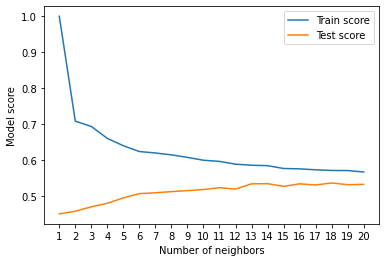

In [328]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

## Hyperparam tuning with RandomizedSearchCV

We're going to tune:
* Logsitic Regression
* Random Forest

.... using RandomizedSearchCV

In [29]:
# Create a hyperparam for Logistic Regression
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Createt a hyperparam grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [330]:
# Tune LogisiticRegression

np.random.seed(42)

# Setup random hyperparams search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparam search model f  or LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [331]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [332]:
rs_log_reg.score(X_test, y_test)

0.46453734147487086

In [333]:
np.random.seed(42)

#Set up hyperparams for RFC
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparam search model for randomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [334]:
# Find best hyperparameters
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [335]:
# Evaluate the randomized search cv
rs_rf.score(X_test, y_test)

0.588069516204791

### Let's try with XGBoost

In [336]:
# Encode the classification values
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train_le)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [ ]:
model.score(X_test,y_test_le)

0.5659934241427901

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
#y_pred = le.inverse_transform(y_pred)

accuracy_score(y_test_le, y_pred)

NameError: name 'model' is not defined

In [340]:
len(y_train.unique())

11

In [341]:
val_list = np.unique(y_train_le)
print(val_list)

[ 0  1  2  3  4  5  6  7  8  9 10]


In [342]:
val_list = np.unique(y_pred)
print(val_list)

[ 0  1  2  3  4  5  6  7  8  9 10]


In [31]:
# Create a grid to try and tune XGBoost
xgb_grid = {"max_depth": [None, 3, 5, 10],
            "subsample": np.arange(0.1,1,0.1),
           "colsample_bylevel": np.arange(0.1,1,0.1),
           "colsample_bytree": np.arange(0.1,1,0.1),
           "min_child_weight": [1, 5, 25, 50, 100],
           "n_estimators": [10,50,100,250,500,1000],
           "learning_rate": np.arange(0.01,0.2,0.01)
           }

In [39]:
#Set up hyperparams for RFC
rs_xgb = RandomizedSearchCV(XGBClassifier(),
                           param_distributions=xgb_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)


In [345]:
# Fit random hyperparam search model for randomForestClassifier()
rs_xgb.fit(X_train, y_train_le)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                        'colsample_bytree': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                        

In [346]:
# Find best hyperparameters
rs_xgb.best_params_

{'subsample': 0.7000000000000001,
 'n_estimators': 250,
 'min_child_weight': 100,
 'max_depth': 5,
 'learning_rate': 0.12,
 'colsample_bytree': 0.5,
 'colsample_bylevel': 0.5}

In [347]:
# Evaluate the randomized search cv
rs_xgb.score(X_test, y_test_le)

0.5814936589948333

Despite years of input data it seems that it is difficult to accurately predict a player's position based on the combine performance, maybe becuase there are too many positions with overlap. Perhaps a different approach for classifying athletes would work.

# KMeans for Player Statistics

Here we will:
1. Import the KMeans algorithm.
2. Group Players into clusters.
3. Summarize the cluster results.
4. Visualize the results,
5. Use our categorization algorithms again to predict player classifications.

In [10]:
# View the data again
combine_df = combine_raw_df
combine_df.head()

,Year,Name,College,POS,Height (in),Weight (lbs),BMI,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1987,Mike Adams,Arizona State,CB,69.8,198.0,28.6,4.42,13.0,32.0,118.0,4.60,NaN
1,1987,John Adickes,Baylor,C,74.8,266.0,33.4,4.97,25.0,26.5,103.0,4.60,NaN
2,1987,Tommy Agee,Auburn,FB,71.8,217.0,29.6,NaN,15.0,NaN,NaN,NaN,NaN
3,1987,David Alexander,Tulsa (OK),C,75.0,279.0,34.9,5.13,22.0,27.5,105.0,4.33,NaN
4,1987,Lyneal Alston,Southern Mississippi,WR,72.1,202.0,27.3,4.64,7.0,32.0,114.0,4.52,NaN


In [11]:
combine_df.isna().sum()

Year                   0
Name                   0
College                7
POS                    0
Height (in)            0
Weight (lbs)           0
BMI                    0
40 Yard             1530
Bench Press         3888
Vert Leap (in)      1986
Broad Jump (in)     2109
Shuttle             3065
3Cone              10354
dtype: int64

We need to get rid of the NaN values again. In this case we will eliminate NaN values, but only delete the 3Cone column. We won't be as worried about positions such as QB where Bench Press data is missing. We'll be more focused on how the algorithm classifies players based on the raw stats. 

In [12]:
# Drop 3Cone and NaN Values
combine_df= combine_df.drop(columns=['3Cone', 'Bench Press'])
combine_df = combine_df.dropna()

combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10734 entries, 0 to 14160
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             10734 non-null  int64  
 1   Name             10734 non-null  object 
 2   College          10734 non-null  object 
 3   POS              10734 non-null  object 
 4   Height (in)      10734 non-null  float64
 5   Weight (lbs)     10734 non-null  float64
 6   BMI              10734 non-null  float64
 7   40 Yard          10734 non-null  float64
 8   Vert Leap (in)   10734 non-null  float64
 9   Broad Jump (in)  10734 non-null  float64
 10  Shuttle          10734 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1006.3+ KB


In [13]:
combine_df.isna().sum()

Year               0
Name               0
College            0
POS                0
Height (in)        0
Weight (lbs)       0
BMI                0
40 Yard            0
Vert Leap (in)     0
Broad Jump (in)    0
Shuttle            0
dtype: int64

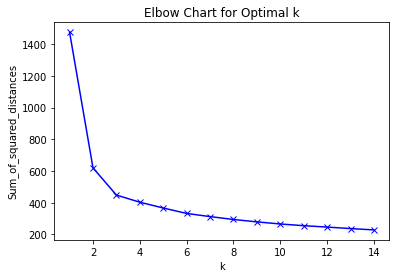

In [14]:
# Import KMeans algorithm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Store categorical data seperately
combine_categorical = combine_df.drop(columns=combine_df.columns[4:])

# Get just values
stats_df = combine_df.drop(columns=combine_df.columns[:4])

# Scale stats
scaler = MinMaxScaler()

scaler.fit(stats_df)
scaled_stats_df = scaler.transform(stats_df)

# Test different values for k
sum_of_squared_distances = []

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_stats_df)
    sum_of_squared_distances.append(km.inertia_)

# Plot the elbow chart
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Chart for Optimal k')
plt.show()

#### The elbow appears at 3 clusters, so that's what we'll try out. Next we'll run the model and combine the predicted clusters wit hthe original dataset.

In [15]:
# Fit the model with just the desired clusters
km = KMeans(n_clusters=3)
km.fit(scaled_stats_df)

# Create resulting clusters
predicted = km.predict(scaled_stats_df)

# Add predictions to the orignial dataframe (unscaled and with all columns)
combine_df['Clusters'] = predicted

combine_df.head()

,Year,Name,College,POS,Height (in),Weight (lbs),BMI,40 Yard,Vert Leap (in),Broad Jump (in),Shuttle,Clusters
0,1987,Mike Adams,Arizona State,CB,69.8,198.0,28.6,4.42,32.0,118.0,4.60,1
1,1987,John Adickes,Baylor,C,74.8,266.0,33.4,4.97,26.5,103.0,4.60,0
3,1987,David Alexander,Tulsa (OK),C,75.0,279.0,34.9,5.13,27.5,105.0,4.33,2
4,1987,Lyneal Alston,Southern Mississippi,WR,72.1,202.0,27.3,4.64,32.0,114.0,4.52,1
5,1987,Steve Alvord,Washington,DE,76.5,273.0,32.8,4.86,28.5,108.0,4.49,0


In [16]:
# Describe each of the clusters, what makes them unique?
cluster_info = combine_df.groupby('Clusters').describe()

cluster_info = pd.DataFrame(cluster_info)

cluster_info.drop(columns=['Year'],inplace=True)

for column in cluster_info.columns:
    measure_df = pd.DataFrame(cluster_info[column])
    print(measure_df)



         Height (in)
               count
Clusters            
0             3533.0
1             4418.0
2             2783.0
         Height (in)
                mean
Clusters            
0          74.733360
1          71.652114
2          76.061700
         Height (in)
                 std
Clusters            
0           1.875741
1           2.001394
2           1.662413
         Height (in)
                 min
Clusters            
0               67.5
1               61.5
2               70.9
         Height (in)
                 25%
Clusters            
0              73.50
1              70.25
2              74.90
         Height (in)
                 50%
Clusters            
0              74.80
1              71.63
2              76.00
         Height (in)
                 75%
Clusters            
0              76.00
1              73.00
2              77.13
         Height (in)
                 max
Clusters            
0              80.88
1              78.30
2            

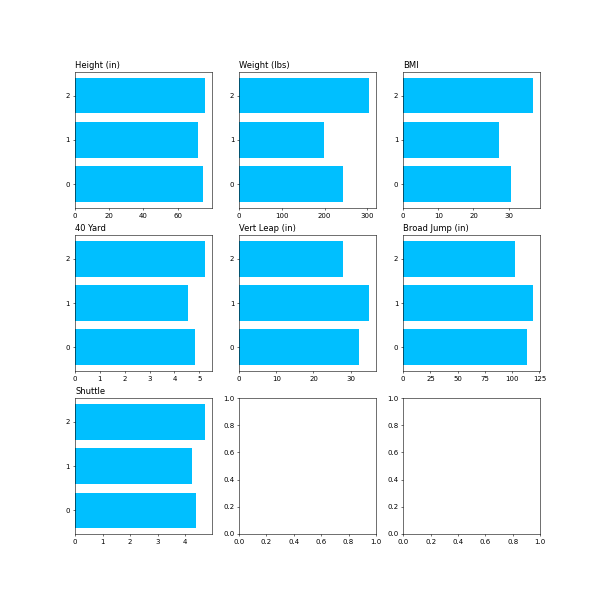

In [46]:
# Combine averages dataframe
combine_means = combine_df.groupby('Clusters').mean().reset_index()

# Create a figure and axes
fig, axes = plt.subplots(3, 3, figsize=(12, 12), dpi=50)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Multiple line plots
for num, column in enumerate(combine_means.drop(['Clusters','Year'], axis=1), start=1):
    ax = axes[num-1]

    # Plot the line plot
    ax.barh(combine_means['Clusters'].astype('string'), combine_means[column], color='deepskyblue', label=column)

    # Add title
    ax.set_title(column, loc='left', fontsize=12, fontweight=0, color='black')

# Show the graph
plt.show()

In [18]:
combine_df.pivot_table(index=['POS'],columns=['Clusters'],
                       aggfunc={'Clusters': 'count'}, fill_value=0)

Clusters           
Clusters        0     1    2
POS                         
C              11     0  350
CB              5  1101    0
DB              0     3    0
DE            703     1  131
DL              3     0    0
DT             79     0  729
EDG            17     0    0
FB            215    33    4
FS             14   419    0
ILB           407    36    2
K               4     3    0
LB             47    10    0
LS             17     0    0
NT              0     0    1
OG             10     0  696
OL              0     0    6
OLB           669   139    3
OT             18     2  838
P               4     4    0
QB            466   120    1
RB            131   756    0
S               1    28    0
SS             16   364    0
TE            617    16   22
WR             79  1383    0

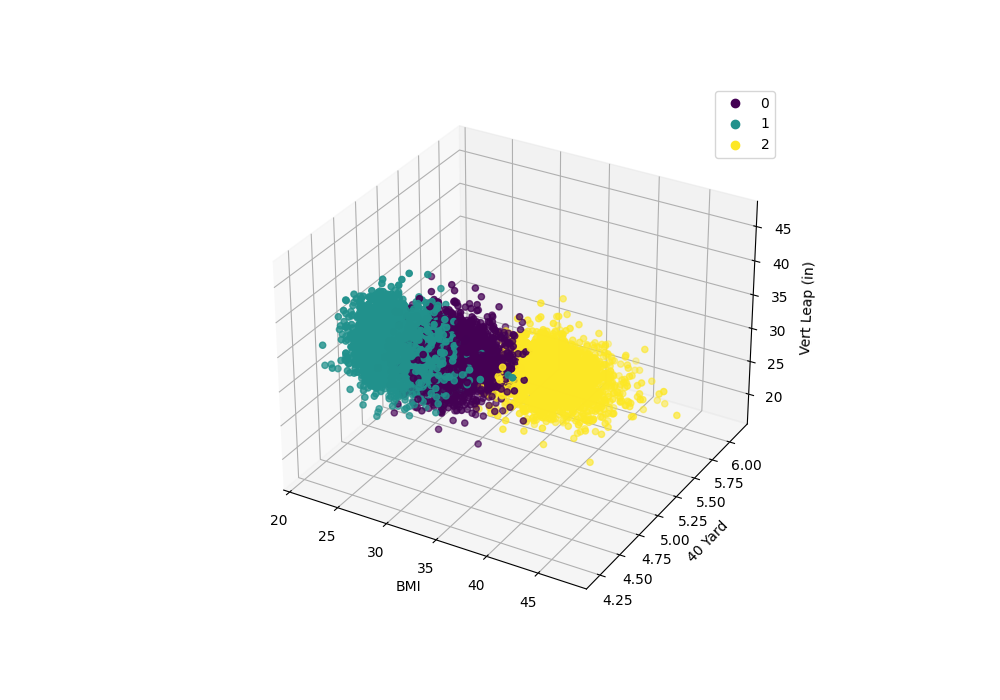

In [21]:
# Create an interactive 3d Scatter plot of the different features

from mpl_toolkits.mplot3d import Axes3D

# for creating a responsive plot 
%matplotlib widget 
  
# Select features for the plot
xs = combine_df['BMI']
# ys = combine_df['Bench Press']
ys = combine_df['40 Yard']
zs = combine_df['Vert Leap (in)']


fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(xs, ys, zs, c=combine_df['Clusters'])

ax.set_xlabel('BMI') 
# ax.set_ylabel('Bench Press') 
ax.set_ylabel('40 Yard')
ax.set_zlabel('Vert Leap (in)') 

ax.legend(*scatter.legend_elements())

plt.show()

### Run Machine Learning Models for Clusters
- Reconfigure the X, y values for the models to Clusters
- Run the previously created function on the new data.
- Run XGBoost on the new function.
- Tune the parameters to see if the models can be more accurate.
- Compare the models and select the most accurate one.

In [22]:
# Split the data into X and y

X = combine_df.drop(columns=['POS','Name','College','Clusters'])
y = combine_df['Clusters']

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
# Rerun the models
models_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
models_scores

c:\Users\seanc\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.9627387051700047,
 'KNN': 0.9646017699115044,
 'Random Forest': 0.984163949697252}

In [30]:
# Tune Random Forest
np.random.seed(42)

#Set up hyperparams for RFC
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparam search model for randomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
rs_rf.score(X_test, y_test)

0.9813693525850024

In [36]:
# Encode the classification values
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)

In [37]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train_le)
model.score(X_test,y_test_le)

0.9869585468095017

In [40]:
# Fit random hyperparam search model for randomForestClassifier()
rs_xgb.fit(X_train, y_train_le)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                        'colsample_bytree': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                        

In [42]:
# Find best hyperparameters
rs_xgb.best_params_

{'subsample': 0.1,
 'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': None,
 'learning_rate': 0.12,
 'colsample_bytree': 0.7000000000000001,
 'colsample_bylevel': 0.9}

In [43]:
# Evaluate the randomized search cv
rs_xgb.score(X_test, y_test_le)

0.9911504424778761